In [7]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [50]:
! head ads.csv

2017-09-13 00:00:00 , 80115
2017-09-13 01:00:00 , 79885
2017-09-13 02:00:00 , 89325
2017-09-13 03:00:00 , 101930
2017-09-13 04:00:00 , 121630
2017-09-13 05:00:00 , 116475
2017-09-13 06:00:00 , 106495
2017-09-13 07:00:00 , 102795
2017-09-13 08:00:00 , 108055
2017-09-13 09:00:00 , 116125


In [51]:
schema = "dt timestamp, value float"
df = spark.read.schema(schema).csv('./ads.csv')
df.createOrReplaceTempView("ads")

In [76]:
df = spark.sql("SELECT first(date(dt)) as dt, avg(value) as mv FROM ads GROUP BY day(dt)").toPandas()

In [79]:
#import pandas as pd
df.dt = pd.to_datetime(df.dt)

In [80]:
df.dtypes

dt    datetime64[ns]
mv           float64
dtype: object

In [81]:
df = df.set_index('dt')

<AxesSubplot:xlabel='dt'>

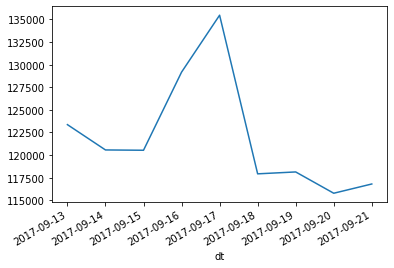

In [82]:
df.mv.plot()

In [83]:
df.describe()

,mv
count,9.000000
mean,121974.050926
std,6481.311273
min,115782.500000
25%,117927.291667
50%,120535.416667
75%,123368.333333
max,135468.750000
